In [1]:
import warnings
warnings.filterwarnings('ignore')

### 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd
wine = pd.read_csv('../Data/wine.csv')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
wine.shape

(6497, 4)

In [6]:
# feature target
data = wine.iloc[:,:3].to_numpy()
target = wine['class'].to_numpy()

In [8]:
# Train test
from sklearn.model_selection import train_test_split
train_input , test_input, train_target , test_target = \
    train_test_split(data,target,random_state=42)

In [9]:
# 표준화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [10]:
# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)

print('train :',lr.score(train_scaled,train_target))
print('test :',lr.score(test_scaled,test_target))

train : 0.7859195402298851
test : 0.7655384615384615


In [11]:
# 가중치와 편차 구하기
print(lr.coef_,lr.intercept_)

[[ 0.53273869  1.67940585 -0.7090217 ]] [1.84713933]


### 결정 트리
- 위에서 본 로지스틱 회귀 모델 결과를 보여주고 고객에게 설명하기는 매우 어렴다. <br><br>
- 그럴 때, 보여주는 것이 결정 트리이다. <br><br>
- 선형 회귀나 KNN와 달리 전처리 과정이 필요없다. 

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_input,train_target)

print('train :',dt.score(train_input,train_target))
print('test :',dt.score(test_input,test_target))

dt.fit(train_scaled,train_target)

print('train :',dt.score(train_scaled,train_target))
print('test :',dt.score(test_scaled,test_target))

train : 0.9973316912972086
test : 0.8516923076923076
train : 0.9973316912972086
test : 0.8516923076923076


> ### scale 하나 안하나 예측률이 똑같다

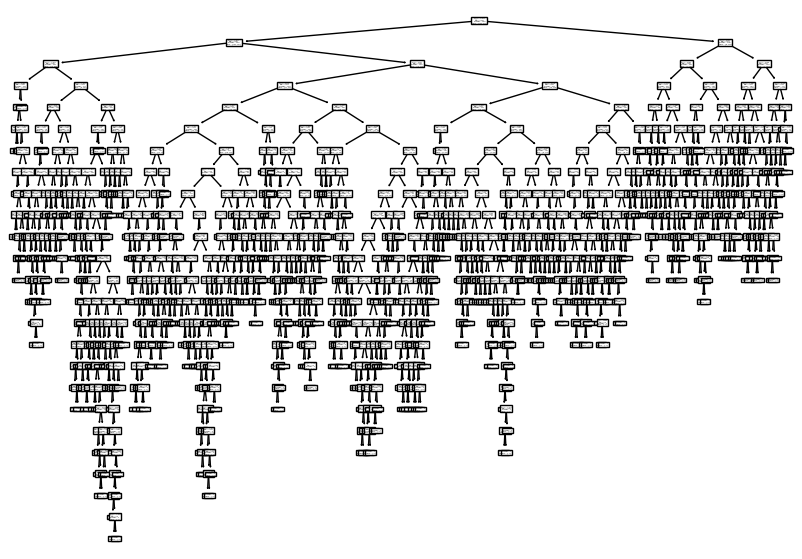

In [14]:
# 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))

plot_tree(dt)

plt.show()

> ### 맨위의 단계를 root node라고 하고 맨 마지막 단계는 leaf node라고 한다. 
> ### 시간이 많이 걸리고 단계가 너무 복잡하다.

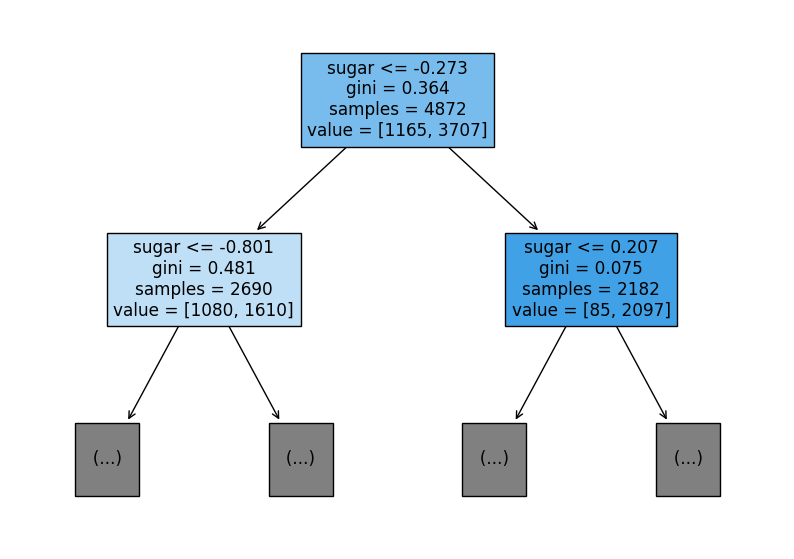

In [19]:
# decision tree의 단계(depth)를 단순하게 하자.
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,filled=True,feature_names=['alcohol','sugar','ph'])
plt.show()

### 가지치기 (Tree Pruning)
- max_depth의 parameter의 값을 조절한다. <br><br>
- decision tree의 과대적합을 막는다. <br><br>

In [24]:
dt = DecisionTreeClassifier(max_depth=3,random_state=42)
dt.fit(train_input,train_target)

print('score:',dt.score(train_input,train_target))
print('test:',dt.score(test_input,test_target))

score: 0.8499589490968801
test: 0.8363076923076923


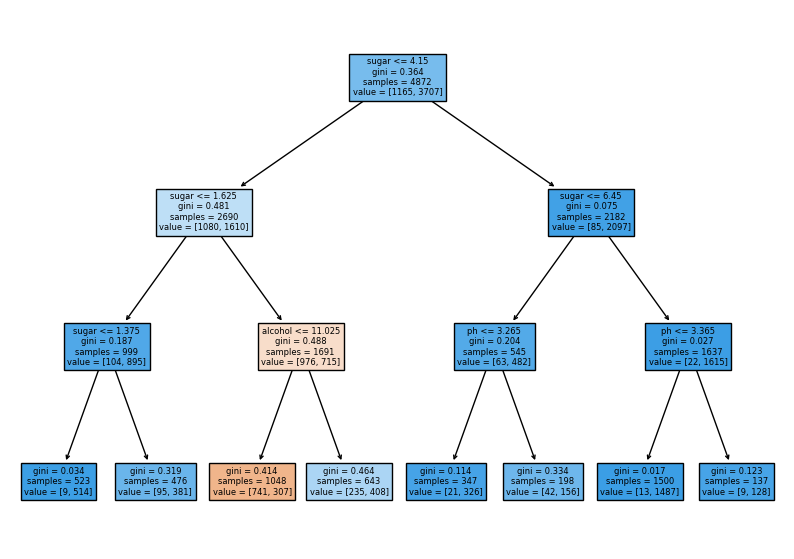

In [26]:
# decision tree의 단계(depth)를 단순하게 하자.
plt.figure(figsize=(10,7))
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','ph'])
plt.show()

> ### 어떠한 column이 판단하는데 중요했냐를 볼 수 있는 것은 decision tree가 가장 좋다

In [27]:
# 특성 중요도
dt.feature_importances_

array([0.12871631, 0.86213285, 0.00915084])

### 최적화 시키기
- 불순도 값을 줘서 가지 치기 할수 있다.

In [28]:
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005,random_state=42) # 불순도가 0.05%까지 찾아준다. 
dt.fit(train_input,train_target)

print('score:',dt.score(train_input,train_target))
print('test:',dt.score(test_input,test_target))

score: 0.8975779967159278
test: 0.8590769230769231


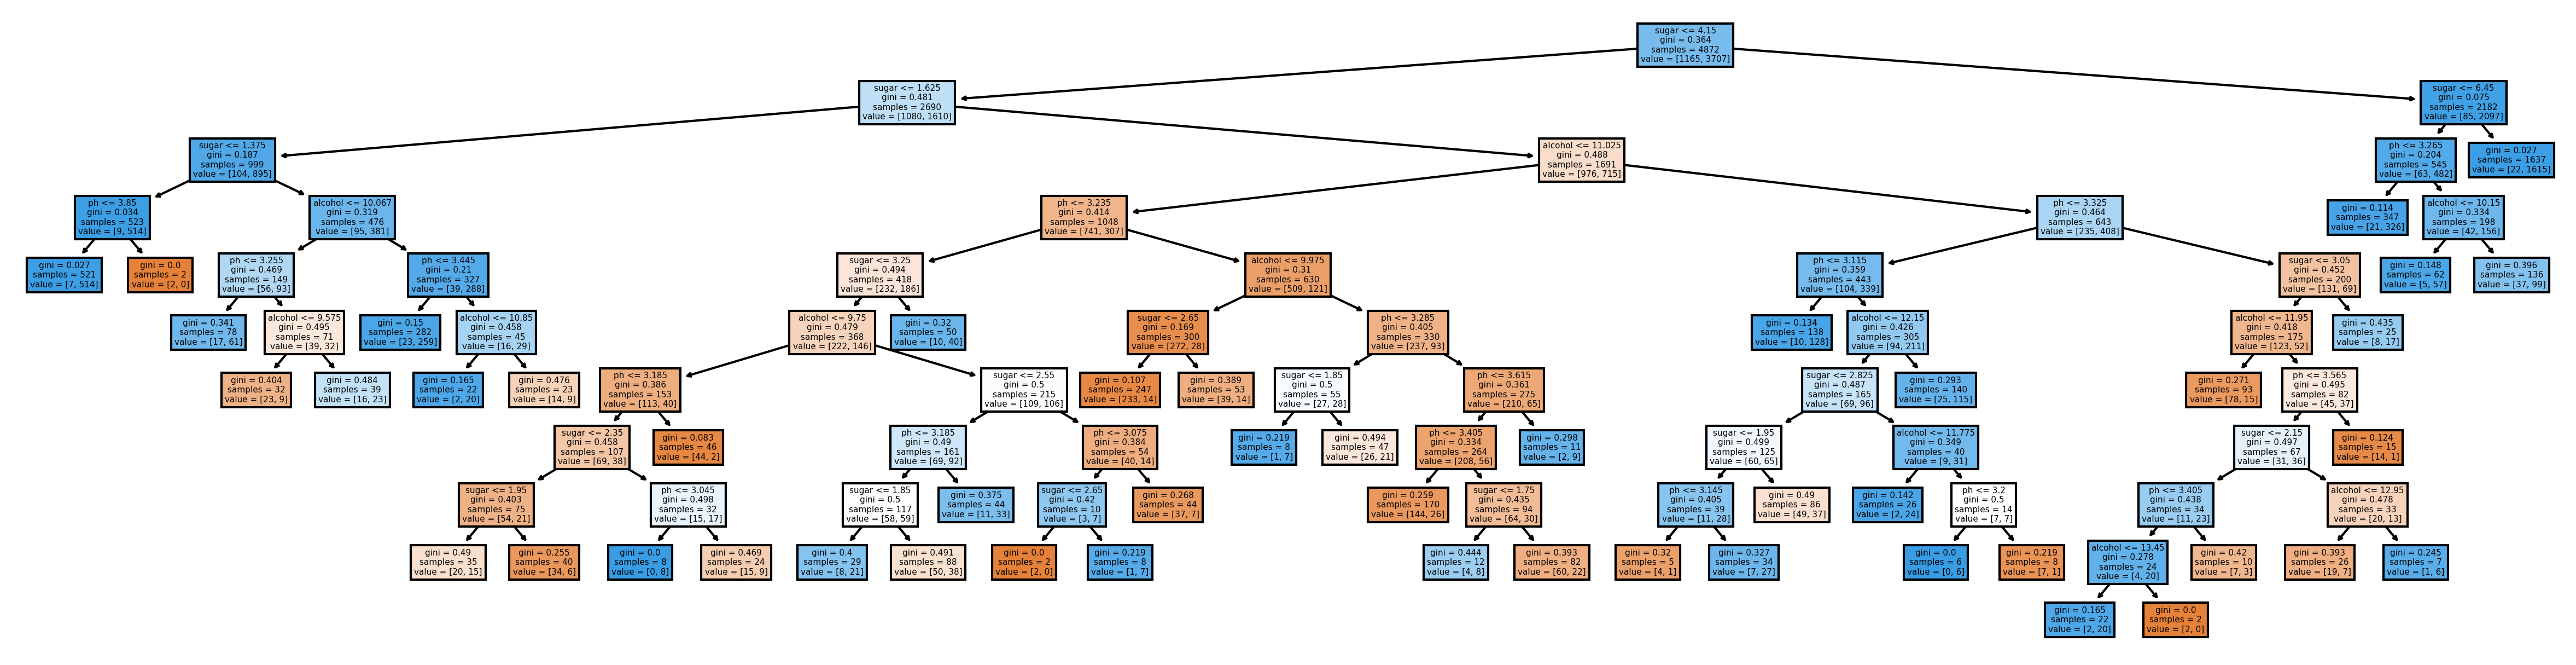

In [31]:
# decision tree의 단계(depth)를 단순하게 하자.
plt.figure(figsize=(20,5),dpi = 300)
plot_tree(dt,filled=True,feature_names=['alcohol','sugar','ph'])
plt.savefig('../Data/wine.jpg')
plt.show()